In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
ed_exp = pd.read_csv("Resources/government-expenditure-on-education.csv")
ed_grad = pd.read_csv('Resources/EAG_GRAD_ENTR_RATES_06022021014126375.csv')
crm_prv = pd.read_csv('Resources/crime_prevelence-youth.csv')
crm_pers_held = pd.read_csv('Resources/crime_persons_held.csv')
crm_enter = pd.read_csv('Resources/crime_entering_prison.csv')

In [3]:
recent_ed_exp=ed_exp.loc[ed_exp["Year"]>=2012]
recent_ed_exp

,Entity,Code,Year,"Government expenditure on education, total (% of GDP)"
10,Afghanistan,AFG,2012,2.52441
11,Afghanistan,AFG,2013,3.47171
12,Afghanistan,AFG,2014,3.77759
13,Afghanistan,AFG,2015,3.24202
28,Albania,ALB,2013,3.53930
...,...,...,...,...
3562,Vietnam,VNM,2012,5.53329
3563,Vietnam,VNM,2013,5.65200
3610,Zimbabwe,ZWE,2012,7.29443
3611,Zimbabwe,ZWE,2013,7.40817


In [4]:
recent_ed_exp=recent_ed_exp.drop('Code', axis=1)
recent_ed_exp

,Entity,Year,"Government expenditure on education, total (% of GDP)"
10,Afghanistan,2012,2.52441
11,Afghanistan,2013,3.47171
12,Afghanistan,2014,3.77759
13,Afghanistan,2015,3.24202
28,Albania,2013,3.53930
...,...,...,...
3562,Vietnam,2012,5.53329
3563,Vietnam,2013,5.65200
3610,Zimbabwe,2012,7.29443
3611,Zimbabwe,2013,7.40817


In [5]:
ed_exp_mean=recent_ed_exp.groupby("Entity")["Government expenditure on education, total (% of GDP)"].mean()

In [6]:
ed_exp_mean=ed_exp_mean.reset_index()
ed_exp_mean

,Entity,"Government expenditure on education, total (% of GDP)"
0,Afghanistan,3.253932
1,Albania,3.496470
2,Andorra,2.991917
3,Argentina,5.504788
4,Armenia,2.645420
...,...,...
143,United Kingdom,5.647870
144,United States,5.042710
145,Vanuatu,5.230350
146,Vietnam,5.592645


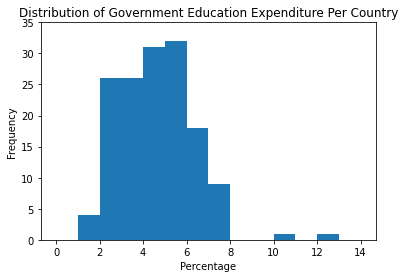

In [7]:
#OUR HISTOGRAM IS SAVING AS AN EMPTY PNG IMAGE IN OUR Output FOLDER!
ed_exp_mean['Government expenditure on education, total (% of GDP)'].plot(kind='hist',bins=list(range(15)))
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Government Education Expenditure Per Country')
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35])
#plt.show()
plt.savefig('Output/histogram_government_edu_exp.png')

In [8]:
top_exp = ed_exp_mean.sort_values(by='Government expenditure on education, total (% of GDP)',ascending=False)
top_20=top_exp.head(20)
top_20
top_20=top_20.set_index('Entity')
top_20

,"Government expenditure on education, total (% of GDP)"
Entity,
Micronesia (country),12.459500
Grenada,10.293130
Iceland,7.812940
Denmark,7.789033
Sweden,7.685060
Moldova,7.506797
Norway,7.506583
Zimbabwe,7.411093
Malta,7.217503


In [9]:
bottom_exp = ed_exp_mean.sort_values(by='Government expenditure on education, total (% of GDP)')
bottom_20=bottom_exp.head(20)
bottom_20=bottom_20.set_index('Entity')
bottom_20

,"Government expenditure on education, total (% of GDP)"
Entity,
Monaco,1.376853
South Sudan,1.560855
Bermuda,1.654863
Cambodia,1.828213
Guinea-Bissau,2.066775
Sri Lanka,2.154724
Myanmar,2.165700
Bangladesh,2.213993
Democratic Republic of Congo,2.267855


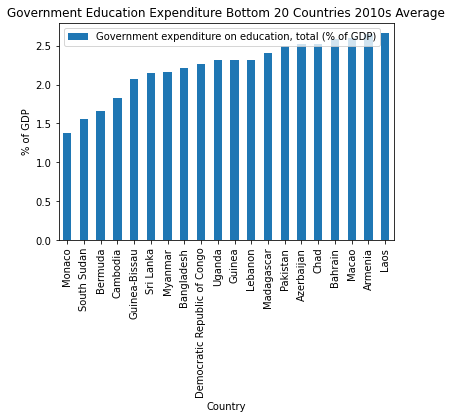

In [10]:
bottom_20.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('% of GDP')
plt.title('Government Education Expenditure Bottom 20 Countries 2010s Average')
plt.savefig("Output/bottom_20_expenditure.png")

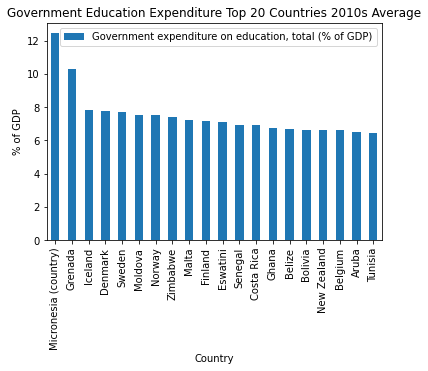

In [11]:
top_20.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('% of GDP')
plt.title('Government Education Expenditure Top 20 Countries 2010s Average')
plt.savefig("Output/top_20_expenditure.png")

In [12]:
ed_grad=ed_grad.drop(['COUNTRY', 'SEX','AGE', 'COUNTRY_ORIGIN', 'International students exclusion', 'ISC11_LEVEL_CAT', 'INDICATOR', 'Indicator', 'YEAR', 'Flag Codes','Flags'], axis=1)

In [13]:
ed_grad=ed_grad.loc[ed_grad['Year']>=2012]
ed_grad

,Country,Gender,Age,Education level and programe orientation,Year,Value
3,Denmark,Total,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2012,48.375
4,Denmark,Total,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2013,52.810
5,Denmark,Total,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2014,54.062
6,Denmark,Total,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2015,54.794
7,Denmark,Total,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2016,59.266
...,...,...,...,...,...,...
23421,Saudi Arabia,Women,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2012,NaN
23422,Saudi Arabia,Women,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2013,NaN
23423,Saudi Arabia,Women,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2014,NaN
23424,Saudi Arabia,Women,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2015,NaN


In [45]:
clean_ed_grad=ed_grad.dropna()
clean_ed_grad

,Country,Gender,Age,Education level and programe orientation,Year,Value
3,Denmark,Total,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2012,48.375
4,Denmark,Total,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2013,52.810
5,Denmark,Total,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2014,54.062
6,Denmark,Total,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2015,54.794
7,Denmark,Total,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2016,59.266
...,...,...,...,...,...,...
23413,Denmark,Men,Less than 30,Short-cycle tertiary education (ISCED2011 leve...,2014,7.714
23414,Denmark,Men,Less than 30,Short-cycle tertiary education (ISCED2011 leve...,2015,8.439
23415,Denmark,Men,Less than 30,Short-cycle tertiary education (ISCED2011 leve...,2016,9.008
23416,Denmark,Men,Less than 30,Short-cycle tertiary education (ISCED2011 leve...,2017,8.883


In [15]:
new_ed_grad=clean_ed_grad.loc[clean_ed_grad['Gender']=='Total']
new_ed_grad=new_ed_grad.loc[new_ed_grad['Age']=='Total: All age groups']
new_ed_grad

,Country,Gender,Age,Education level and programe orientation,Year,Value
35,Spain,Total,Total: All age groups,Short-cycle tertiary education (ISCED2011 leve...,2016,21.598
108,Poland,Total,Total: All age groups,Short-cycle tertiary education (ISCED2011 leve...,2015,0.121
109,Poland,Total,Total: All age groups,Short-cycle tertiary education (ISCED2011 leve...,2016,0.032
379,Germany,Total,Total: All age groups,Doctoral or equivalent level (ISCED2011 level 8),2013,2.363
380,Germany,Total,Total: All age groups,Doctoral or equivalent level (ISCED2011 level 8),2014,2.354
...,...,...,...,...,...,...
23240,Switzerland,Total,Total: All age groups,Total tertiary education (ISCED2011 levels 5 t...,2014,46.264
23241,Switzerland,Total,Total: All age groups,Total tertiary education (ISCED2011 levels 5 t...,2015,45.177
23242,Switzerland,Total,Total: All age groups,Total tertiary education (ISCED2011 levels 5 t...,2016,44.233
23256,Indonesia,Total,Total: All age groups,Master’s or equivalent level (ISCED2011 level 7),2015,1.465


In [23]:
#group by Upper secondary education (ISCED2011 level 3)
new=new_ed_grad.rename(columns={'Education level and programe orientation ':'Education Level'})
new
#and save as "high school"
#set index
# clean_ed_grad=clean_ed_grad.set_index('Country')
# clean_ed_grad
#graph

,Country,Gender,Age,Education Level,Year,Value
35,Spain,Total,Total: All age groups,Short-cycle tertiary education (ISCED2011 leve...,2016,21.598
108,Poland,Total,Total: All age groups,Short-cycle tertiary education (ISCED2011 leve...,2015,0.121
109,Poland,Total,Total: All age groups,Short-cycle tertiary education (ISCED2011 leve...,2016,0.032
379,Germany,Total,Total: All age groups,Doctoral or equivalent level (ISCED2011 level 8),2013,2.363
380,Germany,Total,Total: All age groups,Doctoral or equivalent level (ISCED2011 level 8),2014,2.354
...,...,...,...,...,...,...
23240,Switzerland,Total,Total: All age groups,Total tertiary education (ISCED2011 levels 5 t...,2014,46.264
23241,Switzerland,Total,Total: All age groups,Total tertiary education (ISCED2011 levels 5 t...,2015,45.177
23242,Switzerland,Total,Total: All age groups,Total tertiary education (ISCED2011 levels 5 t...,2016,44.233
23256,Indonesia,Total,Total: All age groups,Master’s or equivalent level (ISCED2011 level 7),2015,1.465


In [33]:
bach_ed=new.loc[new['Education Level']=='Bachelor’s or equivalent level (ISCED2011 level 6)']
bach_ed=bach_ed.groupby('Country')['Value'].mean()
bach_ed=bach_ed.reset_index()
bach_ed=bach_ed.set_index('Country')
bach_ed

,Value
Country,
Australia,42.69060
Austria,20.50000
Belgium,39.36625
Canada,34.32380
Chile,35.86500
China (People's Republic of),21.16650
Czech Republic,35.07125
Denmark,48.57120
Finland,44.63660


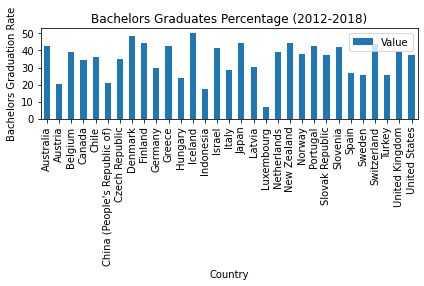

In [39]:
bach_ed.plot(kind='bar')
plt.yticks([0, 10, 20, 30, 40, 50])
plt.xlabel('Country')
plt.ylabel('Bachelors Graduation Rate')
plt.title('Bachelors Graduates Percentage (2012-2018)')
plt.tight_layout()
plt.savefig("Output/bachelors_grad.png")

In [40]:
#but this one is needed to set the country as index
#set index
#graph
bach_ed=new.loc[new['Education Level']=='Master’s or equivalent level (ISCED2011 level 7)']
bach_ed=bach_ed.groupby('Country')['Value'].mean()
bach_ed=bach_ed.reset_index()
bach_ed=bach_ed.set_index('Country')
bach_ed

,Value
Country,
Australia,8.173600
Austria,16.459200
Belgium,11.613000
Canada,9.474400
Chile,10.110000
China (People's Republic of),2.137500
Czech Republic,23.007000
Denmark,23.142800
Finland,20.908800


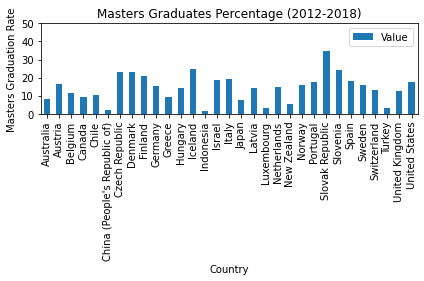

In [41]:
bach_ed.plot(kind='bar')
plt.yticks([0, 10, 20, 30, 40, 50])
plt.xlabel('Country')
plt.ylabel('Masters Graduation Rate')
plt.title('Masters Graduates Percentage (2012-2018)')
plt.tight_layout()
plt.savefig("Output/masters_grad.png")

In [42]:
#group by Bachelor’s or equivalent level (ISCED2011 level 6)
#and save as "bachelors"
#set index
#graph
bach_ed=new.loc[new['Education Level']=='Doctoral or equivalent level  (ISCED2011 level 8)']
bach_ed=bach_ed.groupby('Country')['Value'].mean()
bach_ed=bach_ed.reset_index()
bach_ed=bach_ed.set_index('Country')
bach_ed

,Value
Country,
Australia,1.535800
Austria,1.345200
Belgium,0.330000
Canada,1.163800
Chile,0.257000
China (People's Republic of),0.220000
Czech Republic,1.360000
Denmark,2.000200
Finland,1.957200


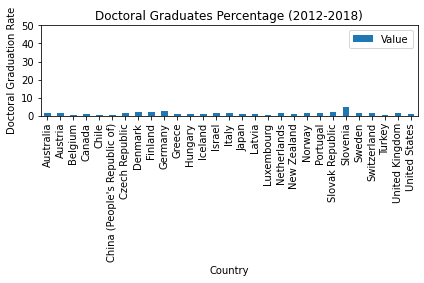

In [43]:
bach_ed.plot(kind='bar')
plt.yticks([0, 10, 20, 30, 40, 50])
plt.xlabel('Country')
plt.ylabel('Doctoral Graduation Rate')
plt.title('Doctoral Graduates Percentage (2012-2018)')
plt.tight_layout()
plt.savefig("Output/doctoral_grad.png")

In [44]:
#group by Master’s or equivalent level (ISCED2011 level 7)
#and save as "masters"
#set index
#graph
#high school doesnt show up because we only included total age grou and total sex and it only shows up if various ages are included
#would duplicates affect mean? 

#bach_ed=clean_ed_grad.loc[new['Education level and programe orientation ']=='Upper secondary general education (ISCED2011 level 3 programme 4)']

#WE NEED TO DROP MALE AND FEMALE AND DROP TOTAL FOR AGE
# bach_ed=bach_ed.groupby('Country')['Value'].mean()
# bach_ed=bach_ed.reset_index()
# bach_ed=bach_ed.set_index('Country')
# bach_ed

,Value
Country,


In [ ]:
#bach_ed.loc('')

In [ ]:
bach_ed.plot(kind='bar')
plt.yticks([0, 10, 20, 30, 40, 50])
plt.xlabel('Country')
plt.ylabel('High School Graduation Rate')
plt.title('Bachelors Graduates Percentage (2012-2018)')
plt.tight_layout()
plt.savefig("Output/bachelors_grad.png")

In [ ]:
#group by Doctoral or equivalent level  (ISCED2011 level 8)
#and save as "doctoral"
#set index
#graph
bach_ed=new.loc[new['Education Level']=='Bachelor’s or equivalent level (ISCED2011 level 6)']
bach_ed=bach_ed.groupby('Country')['Value'].mean()
bach_ed=bach_ed.reset_index()
bach_ed=bach_ed.set_index('Country')
bach_ed

In [ ]:
bach_ed.plot(kind='bar')
plt.yticks([0, 10, 20, 30, 40, 50])
plt.xlabel('Country')
plt.ylabel('Bachelors Graduation Rate')
plt.title('Bachelors Graduates Percentage (2012-2018)')
plt.tight_layout()
plt.savefig("Output/bachelors_grad.png")